In [ ]:
# import the necessary libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#load the dataset
data = load_boston()
#convert the dataset into a Pandas dataframe and add the target column named 'Price'
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#check for null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [ ]:
def create_vif(dataframe):
    ''' This function calculates the Variation Inflation Factors for each column and convert it into a dataframe'''
    
    #create an empty dataframe
    vif_table = pd.DataFrame()
    #populate the first column with the columns of the dataset
    vif_table['variables'] = dataframe.columns
    #calculate the VIF of each column and create a VIF column to store the number
    vif_table['VIF'] = [vif(dataframe.values, i) for i in range(df.shape[1])]
    
    return vif_table

#print the VIF table for each variable
print(create_vif(df))

   variables         VIF
0       CRIM    2.131404
1         ZN    2.910004
2      INDUS   14.485874
3       CHAS    1.176266
4        NOX   74.004269
5         RM  136.101743
6        AGE   21.398863
7        DIS   15.430455
8        RAD   15.369980
9        TAX   61.939713
10   PTRATIO   87.227233
11         B   21.351015
12     LSTAT   12.615188
13     Price   24.503206


In [ ]:
#compress the columns 'DIS', 'RAD', 'INDUS' into 1 column
pca = PCA(n_components=1)
#call the compressed column 'new'
df['new'] = pca.fit_transform(df[['DIS', 'RAD', 'INDUS']])
#drop the three columns from the dataset
df = df.drop(['DIS', 'RAD', 'INDUS'], axis=1)
#recheck the new VIF table
print(create_vif(df))

   variables         VIF
0       CRIM    2.006392
1         ZN    2.349186
2       CHAS    1.173519
3        NOX   65.166302
4         RM  133.757986
5        AGE   18.823276
6        TAX   56.391909
7    PTRATIO   77.938234
8          B   21.345554
9      LSTAT   12.580803
10     Price   23.131681
11       new    9.194328


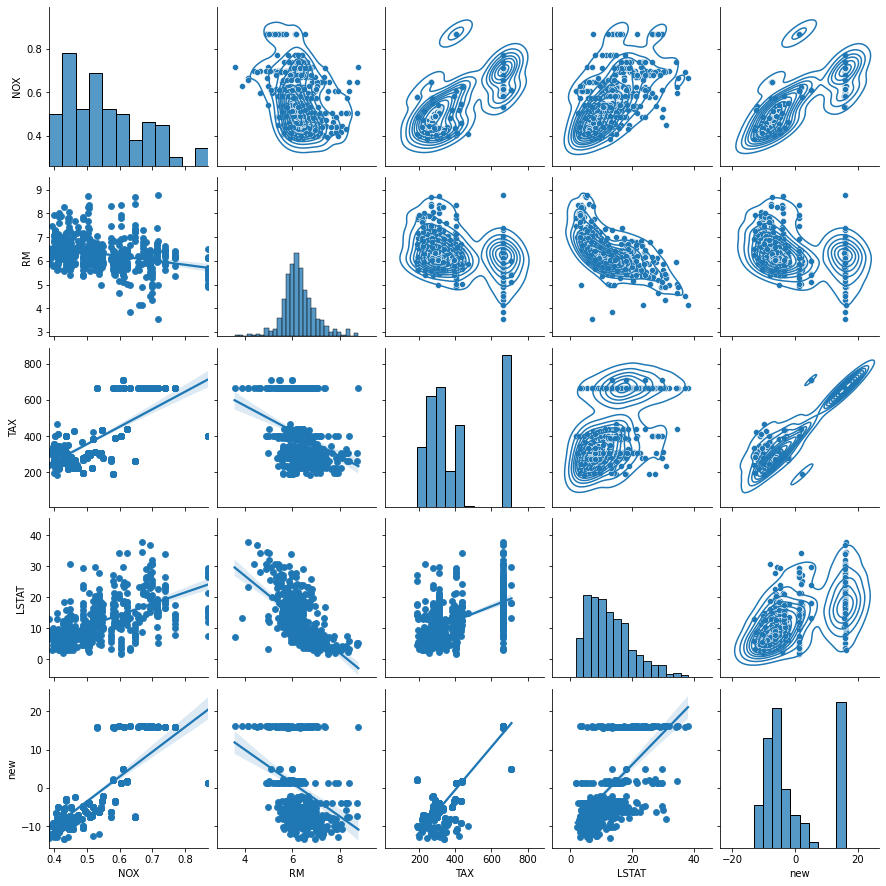

In [ ]:
#print a pairplot to check the relationships between strongly correlated features
pp = sns.pairplot(df[['NOX', 'RM', 'TAX', 'LSTAT', 'new']])
pp = pp.map_lower(sns.regplot)
pp = pp.map_upper(sns.kdeplot);

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1157: RuntimeWarning: invalid value encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1211: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1


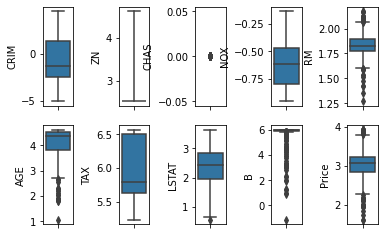

In [ ]:
df1 = df.copy()
# # Create a figure with 10 subplots with a width spacing of 1.5    
fig, ax = plt.subplots(2,5)
fig.subplots_adjust(wspace=1.5)

# Create a boxplot for the continuous features      
box_plot1 = sns.boxplot(y=np.log(df1[df1.columns[0]]), ax=ax[0][0])
box_plot2 = sns.boxplot(y=np.log(df1[df1.columns[1]]), ax=ax[0][1])
box_plot3 = sns.boxplot(y=np.log(df1[df1.columns[2]]), ax=ax[0][2])
box_plot4 = sns.boxplot(y=np.log(df1[df1.columns[3]]), ax=ax[0][3])
box_plot5 = sns.boxplot(y=np.log(df1[df1.columns[4]]), ax=ax[0][4])
box_plot6 = sns.boxplot(y=np.log(df1[df1.columns[5]]), ax=ax[1][0])
box_plot7 = sns.boxplot(y=np.log(df1[df1.columns[6]]), ax=ax[1][1])
box_plot8 = sns.boxplot(y=np.log(df1[df1.columns[-3]]), ax=ax[1][2])
box_plot9 = sns.boxplot(y=np.log(df1[df1.columns[8]]), ax=ax[1][3])
box_plot10 = sns.boxplot(y=np.log(df1[df1.columns[10]]), ax=ax[1][4])

In [ ]:
#One-Hot Encode the CHAS column
df = pd.get_dummies(df, columns=['CHAS'], drop_first=True)
#define the features and the labels, X and y
X = df.drop(['Price'], axis=1)
y = df['Price']

#split the features and labels into  train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#rescale the data to be robust to outliers
scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#built the neural network architecture
model = Sequential()
model.add(Dense(15, input_dim=11, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [ ]:
#train the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
11/11 [==============================] - 3s 17ms/step - loss: 561.5919 - mse: 561.5919 - mae: 21.6196 - val_loss: 534.3728 - val_mse: 534.3728 - val_mae: 20.9099
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 552.2500 - mse: 552.2500 - mae: 21.3341 - val_loss: 525.9639 - val_mse: 525.9639 - val_mae: 20.6689
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 543.4445 - mse: 543.4445 - mae: 21.0759 - val_loss: 517.5277 - val_mse: 517.5277 - val_mae: 20.4361
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 534.7892 - mse: 534.7892 - mae: 20.8448 - val_loss: 509.0839 - val_mse: 509.0839 - val_mae: 20.2126
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 526.1429 - mse: 526.1429 - mae: 20.6062 - val_loss: 501.2100 - val_mse: 501.2100 - val_mae: 20.0073
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 517.9882 - mse: 517.9882 - mae: 20.4010 - val_loss: 492.8143 

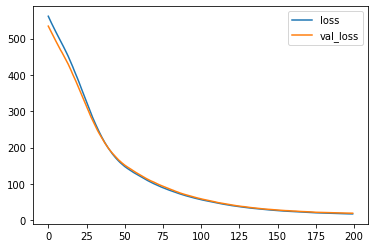

In [ ]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

In [ ]:
#evaluate the model
model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 15ms/step - loss: 17.5405 - mse: 17.5405 - mae: 3.1404


[17.54050064086914, 17.54050064086914, 3.1403918266296387]

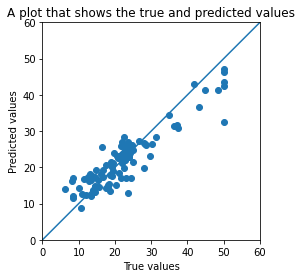

In [ ]:
y_pred = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('A plot that shows the true and predicted values')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.plot([0, 60], [0, 60])

In [ ]:
#built the neural network architecture
model = Sequential()
model.add(Dense(15, input_dim=11, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

#train the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
11/11 [==============================] - 1s 14ms/step - loss: 579.6306 - mse: 579.6306 - mae: 22.1838 - val_loss: 551.3060 - val_mse: 551.3060 - val_mae: 21.3288
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 571.4150 - mse: 571.4150 - mae: 21.9162 - val_loss: 544.2689 - val_mse: 544.2689 - val_mae: 21.1288
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 563.1451 - mse: 563.1451 - mae: 21.6395 - val_loss: 536.9783 - val_mse: 536.9783 - val_mae: 20.9219
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 554.2074 - mse: 554.2074 - mae: 21.3624 - val_loss: 528.8367 - val_mse: 528.8367 - val_mae: 20.7059
Epoch 5/200
11/11 [==============================] - 0s 4ms/step - loss: 544.3029 - mse: 544.3029 - mae: 21.0605 - val_loss: 518.2978 - val_mse: 518.2978 - val_mae: 20.4320
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 533.1375 - mse: 533.1375 - mae: 20.7480 - val_loss: 506.3035 

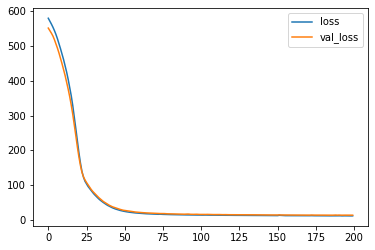

In [ ]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

In [ ]:
#evaluate the model
model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 15ms/step - loss: 14.0964 - mse: 14.0964 - mae: 2.8246


[14.09637451171875, 14.09637451171875, 2.8245575428009033]

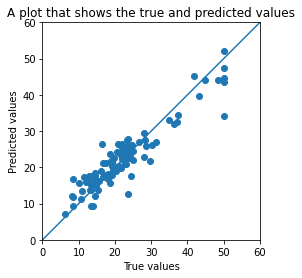

In [ ]:
y_pred = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('A plot that shows the true and predicted values')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.plot([0, 60], [0, 60])